<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random as rnd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
def demanda():
  prob=[0,0.01,0.025,0.045,0.065, 0.087,0.11,0.135,0.162,0.19,0.219,0.254,0.299,0.359,0.424,0.494,0.574,0.649,0.719,0.784,0.844, 0.894,0.934,0.964,0.980,0.995,1]
  u=rnd.random()
  for i in range(len(prob)):
      if prob[i-1] <= u <= prob[i]:
          x=i+34
          break
  return x,u

In [3]:
def demanda_ajustada(x,mes):
  factor_mes=[1.2, 1, 0.9, 0.8, 0.8 ,0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
  j=1
  for j in range(len(factor_mes)):
    if mes==j:
      x=round(x*factor_mes[j-1])
  return x

In [4]:
def entrega(carga_pend):
  carga_pend=True

  v=rnd.random()
  if 0<= v < 0.3:
    entrega=1
  elif 0.3 <= v < 0.7:
    entrega=2
  elif 0.7 <= v < 1:
    entrega=3

  return  entrega,carga_pend


In [5]:
def entrega (carga_pend):
  carga_pend=True

  v=rnd.random()
  if 0<= v < 0.3:
    entrega=1
  elif 0.3 <= v < 0.7:
    entrega=2
  elif 0.7 <= v < 1:
    entrega=3

  return  entrega,carga_pend

In [27]:
inv_inicial=150
data=[]
inventario_i=[150]
carga_pend=False
t_entrega=0
cont=-1
faltante=0

for m in range(12):
  mes=m+1
  dem,val=demanda()                         #DEMANDA
  dem_ajus=demanda_ajustada(dem,mes)        #DEMANDA AJUSTADA

  inv_final=inv_inicial-dem_ajus            #DEMANDA FINAL
  inv_men_prom=(inv_inicial+dem_ajus)/2



  if inv_final<=100 and carga_pend==False:
    t_entrega,carga_pend=entrega(carga_pend)

  if carga_pend==True:
    cont+=1

  if inv_final<0:
    faltante=abs(inv_final)
    data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", "-",f"{faltante}",f"{t_entrega}",f"{inv_men_prom}"])
  else:
    data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", f"{inv_final}",f"{faltante}",f"{t_entrega}",f"{inv_men_prom}"])

  inv_inicial=inv_final

  if cont==t_entrega:
    cont=-1
    inv_inicial+=200
    carga_pend=False
    t_entrega=0
  faltante=0
  inventario_i.append(inv_inicial)

headers = ['Mes', 'Inventario inicial' ,'No. aleatorio' ,'Demanda' ,'Demanda ajustada' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
print(tabulate(data, headers=headers, tablefmt="fancy_grid",showindex=False))


╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Entrega │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│     1 │                  150 │        0.948234 │        57 │                 68 │ 82                 │          0 │         1 │                         109   │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│     2 │                   82 │        0.337934 │        47 │                 47 │ 35                 │          0 │         1 │                          64.5 │
├───────┼───────────────────

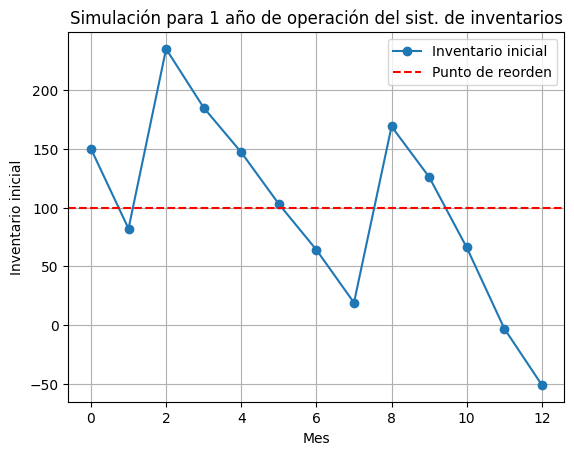

In [28]:
#plt.bar(range(len(inventario_f)), inventario_f)
plt.plot(inventario_i, marker='o', label="Inventario inicial")
plt.title('Simulación para 1 año de operación del sist. de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="red",linestyle='--', label='Punto de reorden')
plt.grid(True)
plt.legend()
plt.show()